# Importação de bibliotecas e arquivos

In [ ]:
#importação de bibliotecas 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

In [ ]:
# Acesso ao Google Drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# csv
df_teste = pd.read_csv('/content/drive/Shareddrives/hefEStos: arquivo X/Modelos (X)/DadosTratadosX.csv')
df_teste.drop('Unnamed: 0', axis=1, inplace = True)
df_teste

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Hora Início,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Total Domicílios | Shr%,AB | Shr%,C1 | Shr%,C2 | Shr%,DE | Shr%,Masculino | Shr%,Feminino | Shr%,4-11 anos | Shr%,12-17 anos | Shr%,18-24 anos | Shr%,25-34 anos | Shr%,35-49 anos | Shr%,50-59 anos | Shr%,60+ anos | Shr%,Total Indivíduos | Fid%,AB | Fid%,C1 | Fid%,C2 | Fid%,DE | Fid%,Masculino | Fid%,Feminino | Fid%,4-11 anos | Fid%,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%,Feriado,Categoria_37,Categoria_38,Categoria_1,Categoria_10,Categoria_11,Categoria_12,Categoria_13,Categoria_14,Categoria_15,Categoria_16,Categoria_17,Categoria_18,Categoria_19,Categoria_2,Categoria_20,Categoria_21,Categoria_22,Categoria_23,Categoria_24,Categoria_25,Categoria_26,Categoria_27,Categoria_28,Categoria_29,Categoria_3,Categoria_30,Categoria_31,Categoria_32,Categoria_33,Categoria_34,Categoria_35,Categoria_36,Categoria_39,Categoria_4,Categoria_40,Categoria_41,Categoria_42,Categoria_5,Categoria_6,Categoria_7,Categoria_8,Categoria_9,Dia,Mes,Ano,Dia da Semana_Domingo,Dia da Semana_Quarta,Dia da Semana_Quinta,Dia da Semana_Segunda,Dia da Semana_Sexta,Dia da Semana_Sábado,Dia da Semana_Terça
0,6.000000,1.09,0.00,1.52,0.00,0.00,0.30,0.40,0.0,0.00,1.18,0.0,0.00,1.73,0.00,34.08,0.00,67.40,0.00,0.00,15.37,57.73,0.0,0.00,100.00,0.0,0.00,100.00,0.00,100.0,0.00,100.0,0.00,0.0,100.00,100.00,0.0,0.0,100.0,0.0,0.00,100.0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,2015.0,0,0,1,0,0,0,0
1,6.083333,1.09,0.00,1.52,0.00,0.00,0.30,0.40,0.0,0.00,1.18,0.0,0.00,1.73,0.00,34.08,0.00,67.40,0.00,0.00,15.37,57.73,0.0,0.00,100.00,0.0,0.00,100.00,0.00,100.0,0.00,100.0,0.00,0.0,100.00,100.00,0.0,0.0,100.0,0.0,0.00,100.0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,2015.0,0,0,1,0,0,0,0
2,6.166667,1.09,0.00,1.52,0.00,0.00,0.30,0.40,0.0,0.00,1.18,0.0,0.00,1.73,0.00,34.08,0.00,67.40,0.00,0.00,15.37,57.73,0.0,0.00,100.00,0.0,0.00,100.00,0.00,100.0,0.00,100.0,0.00,0.0,100.00,100.00,0.0,0.0,100.0,0.0,0.00,100.0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,2015.0,0,0,1,0,0,0,0
3,6.250000,1.09,0.00,1.52,0.00,0.00,0.30,0.40,0.0,0.00,1.18,0.0,0.00,1.73,0.00,34.08,0.00,67.40,0.00,0.00,15.37,57.73,0.0,0.00,100.00,0.0,0.00,100.00,0.00,100.0,0.00,100.0,0.00,0.0,100.00,100.00,0.0,0.0,100.0,0.0,0.00,100.0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,2015.0,0,0,1,0,0,0,0
4,6.333333,1.09,0.00,1.52,0.00,0.00,0.30,0.40,0.0,0.00,1.18,0.0,0.00,1.73,0.00,34.08,0.00,67.40,0.00,0.00,15.37,57.73,0.0,0.00,100.00,0.0,0.00,100.00,0.00,100.0,0.00,100.0,0.00,0.0,100.00,100.00,0.0,0.0,100.0,0.0,0.00,100.0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,2015.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788539,29.583333,1.67,0.30,0.41,1.03,0.53,0.17,0.92,0.0,0.96,0.25,0.0,1.41,0.00,0.71,24.30,12.09,27.88,18.67,6.49,5.70,17.88,0.0,19.77,21.12,0.0,43.45,0.00,13.73,"76,00",100.00,100.0,70.95,60.0,100.00,72.93,0.0,100.0,20.0,0.0,100.00,0.0,60.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,6.0,2022.0,0,0,1,0,0,0,0
788540,29.666667,1.97,0.30,0.41,1.45,0.35,0.17,1.07,0.0,0.96,1.25,0.0,1.41,0.00,0.47,27.12,12.09,27.88,24.45,4.33,5.70,20.04,0.0,19.77,57.25,0.0,43.45,0.00,

# Modelo LightGBM 

In [ ]:
#dataframes
data_frame = df_teste.sample(len(df_teste))
#definindo o y 
y = data_frame['Total Domicílios | Rat%']

# Remoção de todas as colunas que vão ser outputs



In [ ]:
data_frame.drop(['Total Domicílios | Rat%'], axis=1, inplace=True)
data_frame.drop(['Total Indivíduos | Fid%'], axis=1, inplace=True)
data_frame.drop(['Total Domicílios | Shr%'], axis=1, inplace=True)
data_frame.drop(['Masculino | Rat%'], axis=1, inplace=True)
data_frame.drop(['Masculino | Fid%'], axis=1, inplace=True)
data_frame.drop(['Masculino | Shr%'], axis=1, inplace=True)
data_frame.drop(['Feminino | Rat%'], axis=1, inplace=True)
data_frame.drop(['Feminino | Fid%'], axis=1, inplace=True)
data_frame.drop(['Feminino | Shr%'], axis=1, inplace=True)
data_frame.drop(['AB | Rat%'], axis=1, inplace=True)
data_frame.drop(['AB | Fid%'], axis=1, inplace=True)
data_frame.drop(['AB | Shr%'], axis=1, inplace=True)
data_frame.drop(['C1 | Rat%'], axis=1, inplace=True)
data_frame.drop(['C1 | Fid%'], axis=1, inplace=True)
data_frame.drop(['C1 | Shr%'], axis=1, inplace=True)
data_frame.drop(['C2 | Rat%'], axis=1, inplace=True)
data_frame.drop(['C2 | Fid%'], axis=1, inplace=True)
data_frame.drop(['C2 | Shr%'], axis=1, inplace=True)
data_frame.drop(['DE | Rat%'], axis=1, inplace=True)
data_frame.drop(['DE | Fid%'], axis=1, inplace=True)
data_frame.drop(['DE | Shr%'], axis=1, inplace=True)
data_frame.drop(['4-11 anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['4-11 anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['4-11 anos | Shr%'], axis=1, inplace=True)
data_frame.drop(['12-17 anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['12-17 anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['12-17 anos | Shr%'], axis=1, inplace=True)
data_frame.drop(['18-24 anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['18-24 anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['18-24 anos | Shr%'], axis=1, inplace=True)
data_frame.drop(['25-34 anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['25-34 anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['25-34 anos | Shr%'], axis=1, inplace=True)
data_frame.drop(['35-49 anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['35-49 anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['35-49 anos | Shr%'], axis=1, inplace=True)
data_frame.drop(['50-59 anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['50-59 anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['50-59 anos | Shr%'], axis=1, inplace=True)
data_frame.drop(['60+ anos | Rat%'], axis=1, inplace=True)
data_frame.drop(['60+ anos | Fid%'], axis=1, inplace=True)
data_frame.drop(['60+ anos | Shr%'], axis=1, inplace=True)

In [ ]:
data_frame

,Hora Início,Feriado,Categoria_37,Categoria_38,Categoria_1,Categoria_10,Categoria_11,Categoria_12,Categoria_13,Categoria_14,Categoria_15,Categoria_16,Categoria_17,Categoria_18,Categoria_19,Categoria_2,Categoria_20,Categoria_21,Categoria_22,Categoria_23,Categoria_24,Categoria_25,Categoria_26,Categoria_27,Categoria_28,Categoria_29,Categoria_3,Categoria_30,Categoria_31,Categoria_32,Categoria_33,Categoria_34,Categoria_35,Categoria_36,Categoria_39,Categoria_4,Categoria_40,Categoria_41,Categoria_42,Categoria_5,Categoria_6,Categoria_7,Categoria_8,Categoria_9,Dia,Mes,Ano,Dia da Semana_Domingo,Dia da Semana_Quarta,Dia da Semana_Quinta,Dia da Semana_Segunda,Dia da Semana_Sexta,Dia da Semana_Sábado,Dia da Semana_Terça
644844,7.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,2.0,2021.0,0,1,0,0,0,0,0
13607,11.916667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,2.0,2015.0,0,0,0,0,0,0,1
144793,24.083333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,5.0,2016.0,0,0,0,0,0,0,1
532454,25.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,1.0,2020.0,0,0,1,0,0,0,0
29133,9.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12.0,4.0,2015.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150125,12.416667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.0,6.0,2016.0,1,0,0,0,0,0,0
236334,20.500000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31.0,3.0,2017.0,0,0,0,0,1,0,0
392470,23.833333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0,9.0,2018.0,0,0,0,1,0,0,0
679146,9.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,6.0,2021.0,0,1,0,0,0,0,0


In [ ]:
#aqui estamos dividindo os dados que serão de treinamento e os dados que serão de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_frame, y, test_size=0.15, random_state=42)

In [ ]:
X_test.columns

Index(['Hora Início', 'Feriado', 'Categoria_37', 'Categoria_38', 'Categoria_1',
       'Categoria_10', 'Categoria_11', 'Categoria_12', 'Categoria_13',
       'Categoria_14', 'Categoria_15', 'Categoria_16', 'Categoria_17',
       'Categoria_18', 'Categoria_19', 'Categoria_2', 'Categoria_20',
       'Categoria_21', 'Categoria_22', 'Categoria_23', 'Categoria_24',
       'Categoria_25', 'Categoria_26', 'Categoria_27', 'Categoria_28',
       'Categoria_29', 'Categoria_3', 'Categoria_30', 'Categoria_31',
       'Categoria_32', 'Categoria_33', 'Categoria_34', 'Categoria_35',
       'Categoria_36', 'Categoria_39', 'Categoria_4', 'Categoria_40',
       'Categoria_41', 'Categoria_42', 'Categoria_5', 'Categoria_6',
       'Categoria_7', 'Categoria_8', 'Categoria_9', 'Dia', 'Mes', 'Ano',
       'Dia da Semana_Domingo', 'Dia da Semana_Quarta', 'Dia da Semana_Quinta',
       'Dia da Semana_Segunda', 'Dia da Semana_Sexta', 'Dia da Semana_Sábado',
       'Dia da Semana_Terça'],
      dtype='object')

In [ ]:
X_test.shape

(118282, 54)

In [ ]:
#dicionário dos parâmetros para o modelo
hyper_params = {
    'task': 'train', #função de treino
    'boosting_type': 'gbdt', #regressão lightgbm
    'objective': 'regression', #modelo de regressão
    'metric': ['l1','l2'], #métricas (erro médio quadrático e absoluto)
    'learning_rate': 0.5, #velocidade que o modelo aprende
    'feature_fraction': 1, #porcentagem do dataframe
    'verbose': 0, #debug
    "max_depth": 16, #tamanho de cada árvore
    "num_leaves": 256, #número de folhas
    "num_iterations": 20_000 #quantidade de tentativas do modelo
}

In [ ]:
#criação do modelo 

import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params)


In [ ]:
#inserindo os dados 
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=200)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


A saída de streaming foi truncada nas últimas 5000 linhas.
[4750]	valid_0's l1: 0.607332	valid_0's l2: 0.727177
[4751]	valid_0's l1: 0.607328	valid_0's l2: 0.727162
[4752]	valid_0's l1: 0.607323	valid_0's l2: 0.727153
[4753]	valid_0's l1: 0.607312	valid_0's l2: 0.727139
[4754]	valid_0's l1: 0.607309	valid_0's l2: 0.727143
[4755]	valid_0's l1: 0.6073	valid_0's l2: 0.727124
[4756]	valid_0's l1: 0.607289	valid_0's l2: 0.727088
[4757]	valid_0's l1: 0.607289	valid_0's l2: 0.727107
[4758]	valid_0's l1: 0.607296	valid_0's l2: 0.727126
[4759]	valid_0's l1: 0.60728	valid_0's l2: 0.727112
[4760]	valid_0's l1: 0.607277	valid_0's l2: 0.727096
[4761]	valid_0's l1: 0.607271	valid_0's l2: 0.727083
[4762]	valid_0's l1: 0.607272	valid_0's l2: 0.727091
[4763]	valid_0's l1: 0.607262	valid_0's l2: 0.727078
[4764]	valid_0's l1: 0.607268	valid_0's l2: 0.727086
[4765]	valid_0's l1: 0.607268	valid_0's l2: 0.727082
[4766]	valid_0's l1: 0.607262	valid_0's l2: 0.727071
[4767]	valid_0's l1: 0.607258	valid_0's l2:

LGBMRegressor(feature_fraction=1, learning_rate=0.5, max_depth=16,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=256,
              objective='regression', task='train', verbose=0)

In [ ]:
gbm.booster_.save_model("/content/drive/MyDrive/modelo_treinado.txt")

In [ ]:
model = lgb.Booster(model_file='/content/drive/MyDrive/modelo_treinado.txt')
model.predict(X_test)


array([ 9.9574623 , 13.07741123,  1.42382887, ...,  3.21125462,
        4.52600695,  4.60999196])

In [ ]:
# Output do teste - predição
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print(y_pred_test)

[ 9.9574623  13.07741123  1.42382887 ...  3.21125462  4.52600695
  4.60999196]


In [ ]:
# Output do treino - predição

y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print(y_pred_train)

[ 9.480828   19.17012559  4.67996628 ...  8.81226762 20.63638161
 18.32266596]


## Avaliação do modelo

In [ ]:
#R²
from sklearn import metrics
from sklearn.metrics import r2_score
print(metrics.r2_score(y_test, y_pred_test))

0.9888756990920423


In [ ]:
#erro médio absoluto
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_test)

0.5978169459714022

In [ ]:
#erro médio quadrático
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.7089520472398091

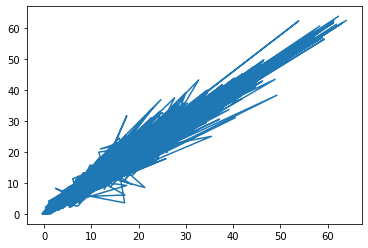

In [ ]:
#usando a biblioteca para fazer o gráfico
plt.plot(y_pred_test, y_test)

In [ ]:
results = {'Real Value': y_test, 'Prediction': y_pred_test}
df_results = pd.DataFrame(results)
df_results.head(100)

,Real Value,Prediction
465729,10.42,9.957462
762415,11.88,13.077411
51253,1.82,1.423829
348796,7.78,8.099702
696491,11.48,10.876578
...,...,...
436339,8.22,7.690604
405275,9.30,9.683716
398874,4.69,4.619255
260196,21.95,23.040541


#Amostras

In [ ]:
#Importação das amostras
amostrinha = pd.read_csv('/content/drive/Shareddrives/hefEStos: arquivo X/Dados - arquivo x/amostraparadesvio3.csv')
amostrinha = amostrinha.iloc[: , 1:]

In [ ]:
#Definição e remoção dos outputs
y_real = amostrinha['Total Domicílios | Rat%']
amostrinha = amostrinha.drop(['Total Domicílios | Rat%'], axis=1)
amostrinha

In [ ]:
#Predição do modelo a partir das amostras
y_pred = y_pred_test.predict(amostrinha)
y_pred
print(y_pred)
print('Desvio padrão: ', np.std(y_pred))

In [ ]:
#Criação de CSV para a comapração de modelos
df_results.to_csv('/content/drive/Shareddrives/hefEStos: arquivo X/Comparação de modelos/csv/amostra_lgbm.csv')

In [ ]:
feature_importance = pd.DataFrame(sorted(zip(gbm.feature_importances_,X_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

#Interação com o usuário

In [ ]:
from pandas.core.arrays.categorical import CategoricalAccessor
import datetime
from datetime import date
#@title Insira os valores para a predição
def preve_rat_tot_dom(data_input,Hora_início,Minuto_início,Hora_fim,Minuto_fim,Feriado_input,Categoria):
  #data_input = '2022-06-22' #@param {type:"date"}
  data_input = data_input.split('-')
  dia = float(data_input[2])
  mes = float(data_input[1])
  ano = float(data_input[0])
  data_input = datetime.date(int(data_input[0]), int(data_input[1]), int(data_input[2]))
  Dia_da_semana = data_input.weekday()
  #Hora_início = 16 #@param {type:"number"}
  #Minuto_início = 30 #@param {type:"number"}
  #Hora_fim = 18 #@param {type:"number"}
  #Minuto_fim = 30 #@param {type:"number"}
  #Feriado_input = True #@param {type:"boolean"}
  #Categoria = 'BBB' #@param ["Jornalismo", "Auditório", "Filme", "Novela", "Series", "Entrevista", "Reality show", "BBB", "Humorístico", "Reportagem", "Educativo", "Documentário", "Futebol", "Esporte", "Político", "Show", "Feminino", "Debate", "Musical", "Religioso", "Sorteio", "Minissérie", "Não consta", "Outros", "Culinário", "Televendas", "Rural", "Carros e motores", "Premiação", "Game show"]


      #Marcação caixa feriado automatica 
  feriados = data_frame['Feriado']
  def verifica_feriado():
    if data_frame['Dia'] == dia and data_frame['Mes'] == mes and data_frame['Ano'] == ano and feriados == 1 :
      Feriado_input = True
    else:
      Feriado_input = False

  #Mensagem de erro se colocar o ano maior que 2100
    if ano > 2100:
      print('Ano invalido, coloque um valor menor que 2100')


  #Conversão de tempo para números que o modelo entende
  #Conversão de tempo para números que o modelo entende
  Hora_início = Hora_início + (Minuto_início/60)
  Hora_fim = Hora_fim + (Minuto_fim/60)
  horarios = [Hora_início]
  h = Hora_início+5/60
  while h<Hora_fim:

    horarios.append(h)
    h+=1/60
  
  horarios.append(Hora_fim)


  S = [0,0,0,0,0,0,0,0]              
  if Dia_da_semana == 'Domingo':
      S[1] = 1
  elif Dia_da_semana == 'Segunda-Feira':
      S[2] = 1
  elif Dia_da_semana == 'Terça-Feira':
      S[3] = 1
  elif Dia_da_semana == 'Quarta-Feira':
      S[4] = 1
  elif Dia_da_semana == 'Quinta-Feira':
      S[5] = 1
  elif Dia_da_semana == 'Sexta-Feira':
      S[6] = 1
  else:
      S[7] = 1

# if Feriado == True:
#   Feriado = 1
# else:
#   Feriado = 0
#Dia da semana



# Categorias

  Categorias =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  if Categoria == 'Jornalismo':
    Categorias[13] = 1 
  elif Categoria == 'Auditório':
    Categorias[0] = 1 
  elif Categoria == 'Filme':
    Categorias[9] = 1 
  elif Categoria == 'Novela':
    Categorias[17] = 1 
  elif Categoria == 'Series':
    Categorias[27] = 1 
  elif Categoria == 'Entrevista':
    Categorias[6] = 1 
  elif Categoria == 'Reality show':
    Categorias[21] = 1 
  elif Categoria == 'BBB':
    Categorias[22] = 1 
  elif Categoria == 'Humorístico':
    Categorias[12] = 1 
  elif Categoria == 'Reportagem':
    Categorias[24] = 1 
  elif Categoria == 'Educativo':
    Categorias[5] = 1 
  elif Categoria == 'Documentário':
    Categorias[4] = 1 
  elif Categoria == 'Futebol':
    Categorias[10] = 1 
  elif Categoria == 'Esporte':
    Categorias[7] = 1 
  elif Categoria == 'Político':
    Categorias[19] = 1 
  elif Categoria == 'Show':
    Categorias[27] = 1 
  elif Categoria == 'Feminino':
    Categorias[8] = 1 
  elif Categoria == 'Debate':
    Categorias[3] = 1 
  elif Categoria == 'Musical':
    Categorias[15] = 1 
  elif Categoria == 'Religioso':
    Categorias[23] = 1 
  elif Categoria == 'Sorteio':
    Categorias[28] = 1 
  elif Categoria == 'Minissérie':
    Categorias[14] = 1 
  elif Categoria == 'Não consta':
    Categorias[16] = 1 
  elif Categoria == 'Outros':
    Categorias[18] = 1 
  elif Categoria == 'Culinário':
    Categorias[2] = 1 
  elif Categoria == 'Televendas':
    Categorias[29] = 1 
  elif Categoria == 'Rural':
    Categorias[25] = 1 
  elif Categoria == 'Carros e motores':
    Categorias[1] = 1 
  elif Categoria == 'Premiação':
    Categorias[20] = 1 
  elif Categoria == 'Game show':
    Categorias[12] = 1 
  elif Categoria == 'JOGOS OLIMP INVERNO MAD':
    Categorias[30] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAD':
    Categorias[31] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAD CONT':
    Categorias[32] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAT':
    Categorias[33] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAT ANT':
    Categorias[34] = 1 
  elif Categoria == 'JOGOS OLIMPICOS NOT':
    Categorias[35] = 1 
  elif Categoria == 'JOGOS PARALIMPICOS MAT':
    Categorias[36] = 1 
  elif Categoria == 'JOGOS PARALIMPICOS MAT ANT':
    Categorias[37] = 1 
  elif Categoria == 'INFANTIL':
    Categorias[38] = 1 
  elif Categoria == 'SAUDE':
    Categorias[39] = 1 
  elif Categoria == 'DESENHO ADULTO':
    Categorias[40] = 1 
  elif Categoria == 'COPA DO MUNDO':
    Categorias[41] = 1 

  teste = [203010]  

  #Agregação a um dataSet
  column_names = ['Hora', 'Prediction', 'Acurácia']
  resultadoOutput = pd.DataFrame(columns = column_names)
  for i in horarios:
    predict = {'Dia' : dia,
           'Mes' : mes,
           'Ano' : ano,
           'Dia da Semana_Segunda' : S[2],
           'Dia da Semana_Terça' : S[3],
           'Dia da Semana_Quarta' : S[4],
           'Dia da Semana_Quinta' : S[5],
           'Dia da Semana_Sexta' : S[6],
           'Dia da Semana_Sábado' : S[7],
           'Dia da Semana_Domingo' : S[1],
           'Hora Início': i,
           'Feriado': Feriado_input,
           'Categoria_1': [Categorias[0]],
           'Categoria_2': [Categorias[1]],
           'Categoria_3': [Categorias[2]],
           'Categoria_4': [Categorias[3]],
           'Categoria_5': [Categorias[4]],
           'Categoria_6': [Categorias[5]],
           'Categoria_7': [Categorias[6]],
           'Categoria_8': [Categorias[7]],
           'Categoria_9': [Categorias[8]],
           'Categoria_10': [Categorias[9]],
           'Categoria_11': [Categorias[10]],
           'Categoria_12': [Categorias[11]],
           'Categoria_13': [Categorias[12]],
           'Categoria_14': [Categorias[13]],
           'Categoria_15': [Categorias[14]],
           'Categoria_16': [Categorias[15]],
           'Categoria_17': [Categorias[16]],
           'Categoria_18': [Categorias[17]],
           'Categoria_19': [Categorias[18]],
           'Categoria_20': [Categorias[19]],
           'Categoria_21': [Categorias[20]],
           'Categoria_22': [Categorias[21]],
           'Categoria_23': [Categorias[22]],
           'Categoria_24': [Categorias[23]],
           'Categoria_25': [Categorias[24]],
           'Categoria_26': [Categorias[25]],
           'Categoria_27': [Categorias[26]],
           'Categoria_28': [Categorias[27]],
           'Categoria_29': [Categorias[28]],
           'Categoria_30': [Categorias[29]],
           'Categoria_31': [Categorias[30]],
           'Categoria_32': [Categorias[31]],
           'Categoria_33': [Categorias[32]],
           'Categoria_34': [Categorias[33]],
           'Categoria_35': [Categorias[34]],
           'Categoria_36': [Categorias[35]],
           'Categoria_37': [Categorias[36]],
           'Categoria_38': [Categorias[37]],
           'Categoria_39': [Categorias[38]],
           'Categoria_40': [Categorias[39]],
           'Categoria_41': [Categorias[40]],
           'Categoria_42': [Categorias[41]]
           }
          
    X_pred_user = pd.DataFrame(predict)
    X_pred_user = X_pred_user[['Hora Início', 'Feriado', 'Categoria_37', 'Categoria_38', 'Categoria_1',
       'Categoria_10', 'Categoria_11', 'Categoria_12', 'Categoria_13',
       'Categoria_14', 'Categoria_15', 'Categoria_16', 'Categoria_17',
       'Categoria_18', 'Categoria_19', 'Categoria_2', 'Categoria_20',
       'Categoria_21', 'Categoria_22', 'Categoria_23', 'Categoria_24',
       'Categoria_25', 'Categoria_26', 'Categoria_27', 'Categoria_28',
       'Categoria_29', 'Categoria_3', 'Categoria_30', 'Categoria_31',
       'Categoria_32', 'Categoria_33', 'Categoria_34', 'Categoria_35',
       'Categoria_36', 'Categoria_39', 'Categoria_4', 'Categoria_40',
       'Categoria_41', 'Categoria_42', 'Categoria_5', 'Categoria_6',
       'Categoria_7', 'Categoria_8', 'Categoria_9', 'Dia', 'Mes', 'Ano',
       'Dia da Semana_Domingo', 'Dia da Semana_Quarta', 'Dia da Semana_Quinta',
       'Dia da Semana_Segunda', 'Dia da Semana_Sexta', 'Dia da Semana_Sábado',
       'Dia da Semana_Terça']]
     #Predição
    y_pred_user = gbm.predict(X_pred_user, num_iteration=gbm.best_iteration_)
    #print(y_pred_user)
  
    results = {'Hora': i, 'Prediction': y_pred_user, 'Acurácia': metrics.r2_score(y_test, y_pred_test)}
    df_results = pd.DataFrame(results)
    #print(results)
    resultadoOutput = resultadoOutput.append({'Hora': i, 'Prediction': y_pred_user[0], 'Acurácia': metrics.r2_score(y_test, y_pred_test)}, ignore_index = True)
  grafico = resultadoOutput.plot(x = 'Hora', y = 'Prediction')
  media = resultadoOutput['Prediction'].mean()
  Acuracia = resultadoOutput['Acurácia'].mean()

  return(grafico, f'media de audiencia: {media}%', f'Acuracia do modelo: {Acuracia*100}%')

In [ ]:
data_input = '2021-12-25' #@param {type:"date"}
Hora_início = 10 #@param {type:"number"}
Minuto_início = 30 #@param {type:"number"}
Hora_fim = 16 #@param {type:"number"}
Minuto_fim = 20 #@param {type:"number"}
Feriado_input = True #@param {type:"boolean"}
Categoria = 'Musical' #@param ["Jornalismo", "Auditório", "Filme", "Novela", "Series", "Entrevista", "Reality show", "BBB", "Humorístico", "Reportagem", "Educativo", "Documentário", "Futebol", "Esporte", "Político", "Show", "Feminino", "Debate", "Musical", "Religioso", "Sorteio", "Minissérie", "Não consta", "Outros", "Culinário", "Televendas", "Rural", "Carros e motores", "Premiação", "Game show"]

preve_rat_tot_dom(data_input,Hora_início,Minuto_início,Hora_fim,Minuto_fim,Feriado_input,Categoria)